In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import datetime as dt
# to make this notebook's output stable across runs
np.random.seed(42)
import seaborn as sns
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import yfinance as yf


In [2]:
lyft = yf.download(tickers='LYFT', period='100d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
lyft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-28,10.97,11.090,10.69,10.70,10.70,10906300
2022-11-29,10.81,11.150,10.59,10.76,10.76,13346800
2022-11-30,10.72,11.250,10.48,11.22,11.22,31346900
2022-12-01,11.27,11.580,11.06,11.20,11.20,10777400
2022-12-02,10.91,11.120,10.71,11.10,11.10,10285500
...,...,...,...,...,...,...
2023-04-17,10.21,10.475,10.15,10.45,10.45,13894100
2023-04-18,10.54,10.550,10.13,10.31,10.31,12387700
2023-04-19,10.17,10.405,9.90,10.27,10.27,13434000


In [4]:
lyft.to_csv

<bound method NDFrame.to_csv of              Open    High    Low  Close  Adj Close    Volume
Date                                                        
2022-11-28  10.97  11.090  10.69  10.70      10.70  10906300
2022-11-29  10.81  11.150  10.59  10.76      10.76  13346800
2022-11-30  10.72  11.250  10.48  11.22      11.22  31346900
2022-12-01  11.27  11.580  11.06  11.20      11.20  10777400
2022-12-02  10.91  11.120  10.71  11.10      11.10  10285500
...           ...     ...    ...    ...        ...       ...
2023-04-17  10.21  10.475  10.15  10.45      10.45  13894100
2023-04-18  10.54  10.550  10.13  10.31      10.31  12387700
2023-04-19  10.17  10.405   9.90  10.27      10.27  13434000
2023-04-20  10.09  10.210   9.75   9.84       9.84  15183700
2023-04-21   9.85  10.520   9.57  10.44      10.44  46630700

[100 rows x 6 columns]>

In [5]:
lyft.to_csv('lyft.csv', index=True)


In [6]:
lyft.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-28,10.97,11.090,10.69,10.70,10.70,10906300
1,2022-11-29,10.81,11.150,10.59,10.76,10.76,13346800
2,2022-11-30,10.72,11.250,10.48,11.22,11.22,31346900
3,2022-12-01,11.27,11.580,11.06,11.20,11.20,10777400
4,2022-12-02,10.91,11.120,10.71,11.10,11.10,10285500
...,...,...,...,...,...,...,...
95,2023-04-17,10.21,10.475,10.15,10.45,10.45,13894100
96,2023-04-18,10.54,10.550,10.13,10.31,10.31,12387700
97,2023-04-19,10.17,10.405,9.90,10.27,10.27,13434000
98,2023-04-20,10.09,10.210,9.75,9.84,9.84,15183700


In [7]:
#Drop the columns Datewe don't need

lyft=lyft[lyft.columns.difference(['Open', 'High', 'Low', 'Adj Close', 'Volume'])].reset_index()

In [8]:
lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    100 non-null    datetime64[ns]
 1   Close   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


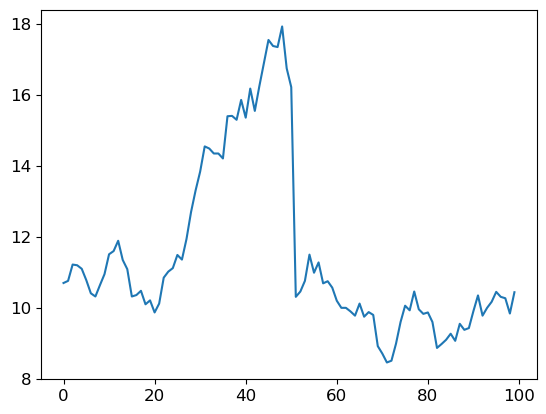

In [9]:
#Plot close

plt.plot(lyft['Close'])
plt.show()

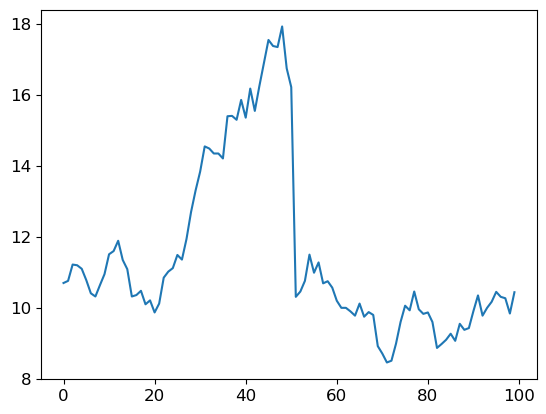

In [10]:
#Plot close

plt.plot(lyft['Close'])
plt.show()

# RESHAPE the data set!

In [11]:
lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    100 non-null    datetime64[ns]
 1   Close   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [12]:
lyft.shape

(100, 2)

In [13]:
lyft.groupby(['Date']).count()

,Close
Date,
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
2022-12-02,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [14]:
lyft.head(5)

,Date,Close
0,2022-11-28,10.70
1,2022-11-29,10.76
2,2022-11-30,11.22
3,2022-12-01,11.20
4,2022-12-02,11.10


<AxesSubplot:xlabel='Date', ylabel='Close'>

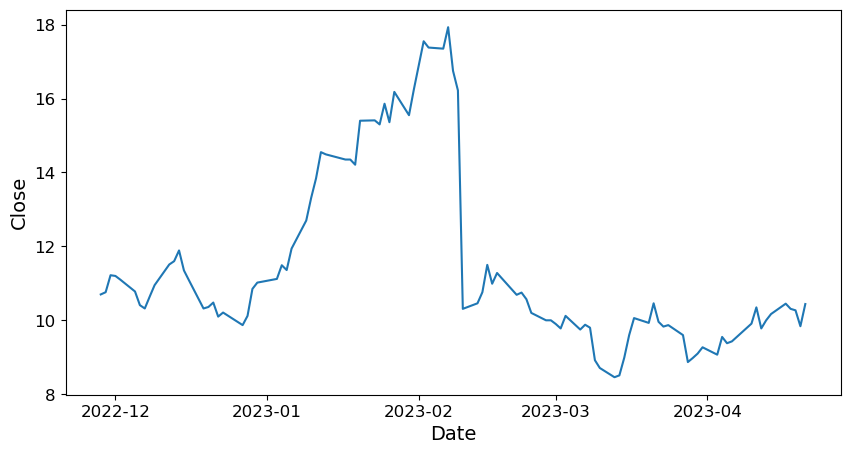

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='Close',data=lyft)

In [16]:
lyft.head(12)

,Date,Close
0,2022-11-28,10.70
1,2022-11-29,10.76
2,2022-11-30,11.22
3,2022-12-01,11.20
4,2022-12-02,11.10
5,2022-12-05,10.78
6,2022-12-06,10.41
7,2022-12-07,10.32
8,2022-12-08,10.64
9,2022-12-09,10.95


In [17]:
# Re-organize the data set by day and hours

temp = np.array(lyft['Close']).reshape(10,10)

temp

array([[10.69999981, 10.76000023, 11.22000027, 11.19999981, 11.10000038,
        10.77999973, 10.40999985, 10.31999969, 10.64000034, 10.94999981],
       [11.51000023, 11.60000038, 11.89000034, 11.35000038, 11.09000015,
        10.31999969, 10.35999966, 10.47999954, 10.10000038, 10.21000004],
       [ 9.86999989, 10.11999989, 10.85000038, 11.02000046, 11.11999989,
        11.48999977, 11.35999966, 11.93999958, 12.69999981, 13.31000042],
       [13.84000015, 14.55000019, 14.48999977, 14.35000038, 14.35000038,
        14.21000004, 15.39999962, 15.40999985, 15.30000019, 15.85999966],
       [15.35999966, 16.18000031, 15.55000019, 16.25      , 16.89999962,
        17.54999924, 17.37999916, 17.35000038, 17.93000031, 16.75      ],
       [16.21999931, 10.31000042, 10.46000004, 10.76000023, 11.5       ,
        10.98999977, 11.27999973, 10.68999958, 10.75      , 10.56999969],
       [10.19999981, 10.        , 10.        ,  9.89999962,  9.77999973,
        10.11999989,  9.75      ,  9.88000011

In [18]:
lyft.shape

(100, 2)

In [19]:
# Convert to dataframe

temp_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,10.700000,10.76,11.22,11.20,11.10,10.780000,10.410000,10.32,10.64,10.95
1,11.510000,11.60,11.89,11.35,11.09,10.320000,10.360000,10.48,10.10,10.21
2,9.870000,10.12,10.85,11.02,11.12,11.490000,11.360000,11.94,12.70,13.31
3,13.840000,14.55,14.49,14.35,14.35,14.210000,15.400000,15.41,15.30,15.86
4,15.360000,16.18,15.55,16.25,16.90,17.549999,17.379999,17.35,17.93,16.75
5,16.219999,10.31,10.46,10.76,11.50,10.990000,11.280000,10.69,10.75,10.57
6,10.200000,10.00,10.00,9.90,9.78,10.120000,9.750000,9.88,9.80,8.92
7,8.710000,8.46,8.51,8.99,9.60,10.060000,9.930000,10.46,9.96,9.83
8,9.870000,9.60,8.87,8.98,9.10,9.270000,9.070000,9.55,9.38,9.43
9,9.910000,10.35,9.78,10.00,10.17,10.450000,10.310000,10.27,9.84,10.44


### Reshaping for Standardization

In [20]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(100, 1)

In [21]:
temp_1feature

array([[10.69999981],
       [10.76000023],
       [11.22000027],
       [11.19999981],
       [11.10000038],
       [10.77999973],
       [10.40999985],
       [10.31999969],
       [10.64000034],
       [10.94999981],
       [11.51000023],
       [11.60000038],
       [11.89000034],
       [11.35000038],
       [11.09000015],
       [10.31999969],
       [10.35999966],
       [10.47999954],
       [10.10000038],
       [10.21000004],
       [ 9.86999989],
       [10.11999989],
       [10.85000038],
       [11.02000046],
       [11.11999989],
       [11.48999977],
       [11.35999966],
       [11.93999958],
       [12.69999981],
       [13.31000042],
       [13.84000015],
       [14.55000019],
       [14.48999977],
       [14.35000038],
       [14.35000038],
       [14.21000004],
       [15.39999962],
       [15.40999985],
       [15.30000019],
       [15.85999966],
       [15.35999966],
       [16.18000031],
       [15.55000019],
       [16.25      ],
       [16.89999962],
       [17

## Standardize the values

In [22]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

In [23]:
temp_reshaped = temp_std.reshape(10,10)

temp_reshaped.shape

(10, 10)

In [24]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.317432,-0.292619,-0.102392,-0.110663,-0.152016,-0.284349,-0.437358,-0.474576,-0.342244,-0.214047
1,0.017534,0.054753,0.174679,-0.048632,-0.156152,-0.474576,-0.458035,-0.408410,-0.565554,-0.520065
2,-0.660668,-0.557284,-0.255401,-0.185099,-0.143746,0.009263,-0.044497,0.195355,0.509644,0.761902
3,0.981077,1.274689,1.249877,1.191982,1.191982,1.134086,1.626196,1.630332,1.584843,1.816424
4,1.609655,1.948756,1.688227,1.977704,2.246503,2.515303,2.445001,2.432596,2.672448,2.184473
5,1.965297,-0.478711,-0.416681,-0.292619,0.013399,-0.197506,-0.077580,-0.321567,-0.296755,-0.371192
6,-0.524201,-0.606908,-0.606908,-0.648262,-0.697887,-0.557284,-0.710293,-0.656533,-0.689616,-1.053529
7,-1.140372,-1.243757,-1.223080,-1.024582,-0.772323,-0.582096,-0.635856,-0.416681,-0.623450,-0.677210
8,-0.660668,-0.772323,-1.074206,-1.028717,-0.979092,-0.908791,-0.991499,-0.793000,-0.863302,-0.842625
9,-0.644127,-0.462170,-0.697887,-0.606908,-0.536607,-0.420816,-0.478711,-0.495253,-0.673074,-0.424952


### Data Split

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

In [26]:
train.shape

(7, 10)

In [27]:
test.shape

(3, 10)

## Create Input and Target values

In [28]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-0.317432,-0.292619,-0.102392,-0.110663,-0.152016,-0.284349,-0.437358,-0.474576,-0.342244
1,-1.140372,-1.243757,-1.223080,-1.024582,-0.772323,-0.582096,-0.635856,-0.416681,-0.623450
2,-0.660668,-0.557284,-0.255401,-0.185099,-0.143746,0.009263,-0.044497,0.195355,0.509644
3,-0.644127,-0.462170,-0.697887,-0.606908,-0.536607,-0.420816,-0.478711,-0.495253,-0.673074
4,1.609655,1.948756,1.688227,1.977704,2.246503,2.515303,2.445001,2.432596,2.672448
5,0.981077,1.274689,1.249877,1.191982,1.191982,1.134086,1.626196,1.630332,1.584843
6,-0.524201,-0.606908,-0.606908,-0.648262,-0.697887,-0.557284,-0.710293,-0.656533,-0.689616


#### Adding one more dimension  to make it ready for RNNs

In [29]:
train_inputs

array([[-0.31743178, -0.29261933, -0.10239188, -0.11066283, -0.15201638,
        -0.28434878, -0.43735776, -0.47457623, -0.34224383],
       [-1.14037213, -1.24375661, -1.22307963, -1.02458163, -0.77232325,
        -0.58209579, -0.63585577, -0.41668079, -0.62344974],
       [-0.66066822, -0.55728374, -0.25540086, -0.18509938, -0.14374583,
         0.00926315, -0.04449682,  0.19535514,  0.50964404],
       [-0.64412672, -0.46216981, -0.69788669, -0.60690824, -0.53660676,
        -0.42081626, -0.47871131, -0.49525281, -0.67307424],
       [ 1.60965482,  1.94875618,  1.68822725,  1.97770371,  2.24650319,
         2.51530268,  2.4450012 ,  2.43259557,  2.67244753],
       [ 0.9810774 ,  1.27468934,  1.24987689,  1.19198183,  1.19198183,
         1.13408638,  1.62619633,  1.6303318 ,  1.58484277],
       [-0.52420074, -0.60690824, -0.60690824, -0.64826219, -0.69788669,
        -0.55728374, -0.71029272, -0.65653274, -0.68961574]])

In [30]:
train_inputs.shape 

(7, 9)

In [31]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [32]:
train_x

array([[[-0.31743178],
        [-0.29261933],
        [-0.10239188],
        [-0.11066283],
        [-0.15201638],
        [-0.28434878],
        [-0.43735776],
        [-0.47457623],
        [-0.34224383]],

       [[-1.14037213],
        [-1.24375661],
        [-1.22307963],
        [-1.02458163],
        [-0.77232325],
        [-0.58209579],
        [-0.63585577],
        [-0.41668079],
        [-0.62344974]],

       [[-0.66066822],
        [-0.55728374],
        [-0.25540086],
        [-0.18509938],
        [-0.14374583],
        [ 0.00926315],
        [-0.04449682],
        [ 0.19535514],
        [ 0.50964404]],

       [[-0.64412672],
        [-0.46216981],
        [-0.69788669],
        [-0.60690824],
        [-0.53660676],
        [-0.42081626],
        [-0.47871131],
        [-0.49525281],
        [-0.67307424]],

       [[ 1.60965482],
        [ 1.94875618],
        [ 1.68822725],
        [ 1.97770371],
        [ 2.24650319],
        [ 2.51530268],
        [ 2.4450012 ],
   

### set the target

In [33]:
train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.214047
1,-0.677210
2,0.761902
3,-0.424952
4,2.184473
5,1.816424
6,-1.053529


### Repeat for test

In [34]:
test.shape

(3, 10)

In [35]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [36]:
#Create an additional dimension for test

test_x = test_inputs[...,np.newaxis]

test_x.shape 

(3, 9, 1)

In [37]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-0.842625
1,-0.520065
2,-0.371192


# A normal (cross-sectional) NN

In [38]:
model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 448ms/step - loss: 0.5535
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.5139
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4769
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4426
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4109
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.3817
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3093
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 13/100
1/1 [==============================] - 0s 1ms/

### Predictions

In [39]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 82ms/step


In [40]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [41]:
comparison

,actual,predicted
0,9.43,8.687678
1,10.21,10.491647
2,10.57,10.170894


In [42]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.2632174679074524

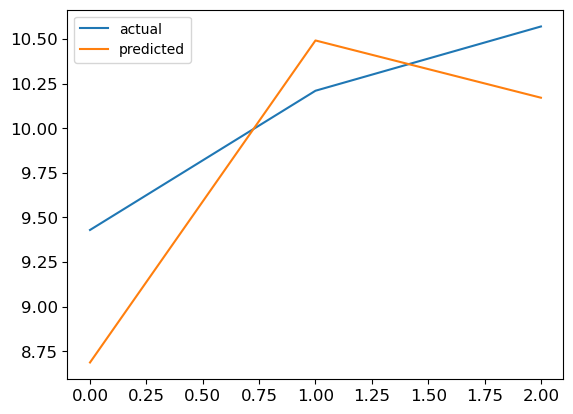

In [43]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN

In [44]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.8888
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 0.8052
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 0.7283
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6568
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 0.5889
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5245
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.4638
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 0.4062
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3527
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 0.3037
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.2587
Epoch 12/30
1/1 [==============================] - 0s 0s/step - loss: 0.2186
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss: 0.184

### Predictions

In [46]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 230ms/step


In [47]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [48]:
comparison

,actual,predicted
0,9.43,9.485877
1,10.21,10.282676
2,10.57,11.121612


In [49]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.10422655194694623

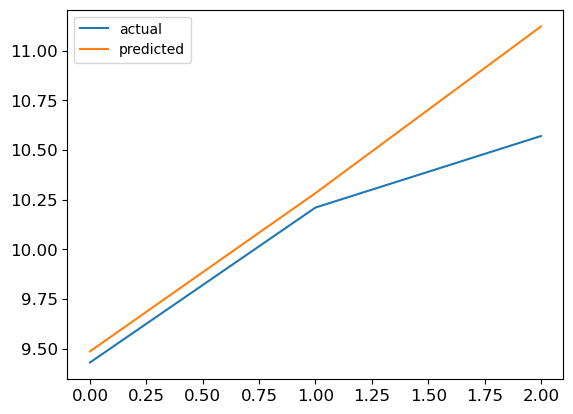

In [50]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

##  Simple RNN with more layers

In [51]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.4068
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 1.2595
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 1.1319
Epoch 4/30
1/1 [==============================] - 0s 0s/step - loss: 1.0374
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 0.9568
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8810
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 0.8059
Epoch 8/30
1/1 [==============================] - 0s 0s/step - loss: 0.7301
Epoch 9/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6538
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5787
Epoch 11/30
1/1 [==============================] - 0s 0s/step - loss: 0.5080
Epoch 12/30
1/1 [==============================] - 0s 0s/step - loss: 0.4485
Epoch 13/30
1/1 [==============================] - 0s 20ms/step - loss: 0.3963
E

In [53]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 259ms/step


In [54]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [55]:
comparison

,actual,predicted
0,9.43,8.157058
1,10.21,10.906904
2,10.57,11.879120


In [56]:
mean_squared_error(comparison['actual'], comparison['predicted'])

1.2732845994596573

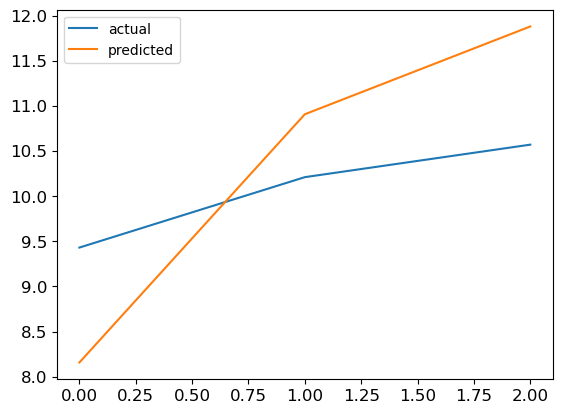

In [57]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [58]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.8856
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 1.8508
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 1.8167
Epoch 4/30
1/1 [==============================] - 0s 0s/step - loss: 1.7831
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 1.7502
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 1.7177
Epoch 7/30
1/1 [==============================] - 0s 0s/step - loss: 1.6857
Epoch 8/30
1/1 [==============================] - 0s 0s/step - loss: 1.6542
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 1.6231
Epoch 10/30
1/1 [==============================] - 0s 0s/step - loss: 1.5924
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 1.5620
Epoch 12/30
1/1 [==============================] - 0s 7ms/step - loss: 1.5320
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss: 1.5023

### Predict

In [60]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 178ms/step


In [61]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [62]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.5969363875231769

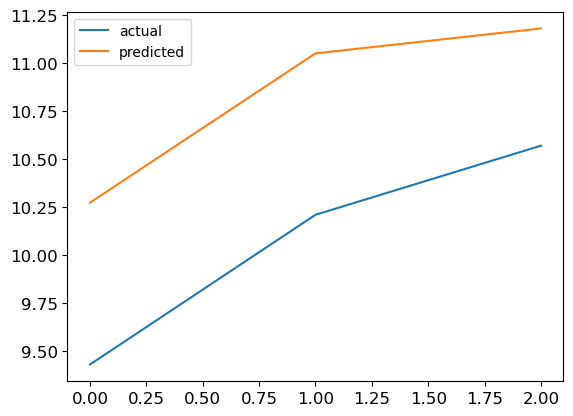

In [63]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### LSTM with more layers

In [64]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.5832
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 1.5025
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.4245
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 1.3487
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 1.2746
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 1.2018
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 1.1297
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 1.0582
Epoch 9/30
1/1 [==============================] - 0s 0s/step - loss: 0.9868
Epoch 10/30
1/1 [==============================] - 0s 18ms/step - loss: 0.9155
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.8442
Epoch 12/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7730
Epoch 13/30
1/1 [==============================] - 0s 0s/step - loss

### Predcitions

In [66]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 2s 2s/step


In [67]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [68]:
mean_squared_error(comparison['actual'], comparison['predicted'])

2.406388908097142

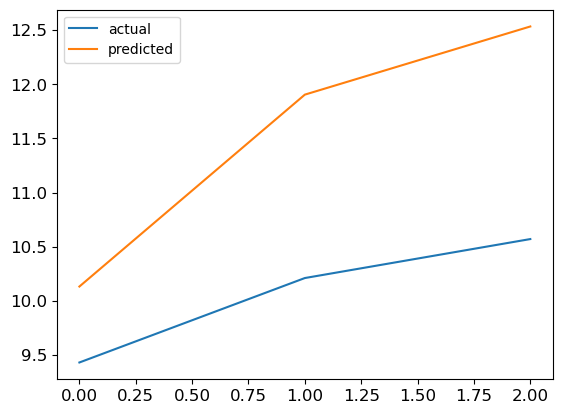

In [69]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### GRU (with more layers)

In [70]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [71]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 1.4979
Epoch 2/30
1/1 [==============================] - 0s 23ms/step - loss: 1.3702
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 1.2778
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 1.2024
Epoch 5/30
1/1 [==============================] - 0s 19ms/step - loss: 1.1353
Epoch 6/30
1/1 [==============================] - 0s 21ms/step - loss: 1.0753
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 1.0188
Epoch 8/30
1/1 [==============================] - 0s 28ms/step - loss: 0.9647
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.9121
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.8608
Epoch 11/30
1/1 [==============================] - 0s 21ms/step - loss: 0.8118
Epoch 12/30
1/1 [==============================] - 0s 3ms/step - loss: 0.7662
Epoch 13/30
1/1 [==============================] - 0s 26ms/step - l

### Predictions

In [72]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 451ms/step


In [73]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [74]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.6548608791532994

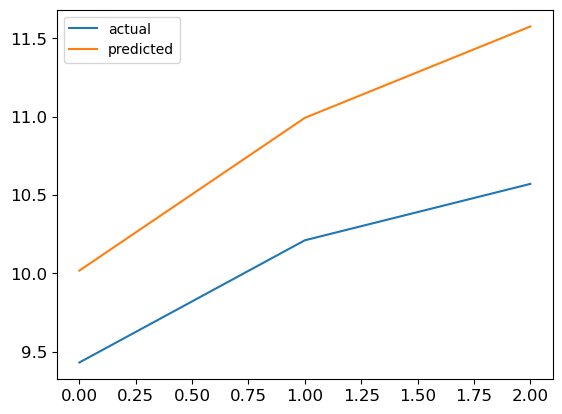

In [75]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### Conv1D

In [76]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.3948
Epoch 2/30
1/1 [==============================] - 0s 237ms/step - loss: 1.3469
Epoch 3/30
1/1 [==============================] - 0s 202ms/step - loss: 1.2993
Epoch 4/30
1/1 [==============================] - 0s 220ms/step - loss: 1.2520
Epoch 5/30
1/1 [==============================] - 0s 209ms/step - loss: 1.2057
Epoch 6/30
1/1 [==============================] - 0s 238ms/step - loss: 1.1594
Epoch 7/30
1/1 [==============================] - 0s 233ms/step - loss: 1.1128
Epoch 8/30
1/1 [==============================] - 0s 222ms/step - loss: 1.0657
Epoch 9/30
1/1 [==============================] - 0s 224ms/step - loss: 1.0177
Epoch 10/30
1/1 [==============================] - 0s 217ms/step - loss: 0.9669
Epoch 11/30
1/1 [==============================] - 0s 216ms/step - loss: 0.9135
Epoch 12/30
1/1 [==============================] - 0s 205ms/step - loss: 0.8571
Epoch 13/30
1/1 [==============================] - 0

### Predictions

In [78]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 484ms/step


In [79]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [80]:
mean_squared_error(comparison['actual'], comparison['predicted'])

0.46919455350810796


The LSTM model with multiple layers has a significantly higher RMSE of 2.40, indicating that adding more layers to the LSTM model did not improve its performance on this dataset.

The provided RMSE value of 0.10 for Simple RNN indicates that it performs the best among all the models on the given datase. However, it is important to note that other factors, such as the model's interpretability and training time, should also be considered when selecting the best model for a particular problem.






### In this case Simple RNN  performed better than other models with less rmse value